In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

## Data Preprocessing

### House Price(House price change + Avg house price)

In [2]:
df_house = pd.read_csv('Houses-by-suburb.csv')
# display(df_house.head())

# Filter the df to display rows where column contains '-'
rows_with_hyphen = df_house[df_house.apply(lambda row: row.astype(str).str.contains('-').any(), axis=1)]

display(rows_with_hyphen)

# Drop these rows
df_house = df_house.drop(rows_with_hyphen.index)
# display(df_house.head())

display(f"There are {df_house.isnull().sum().sum()} missing values in the DataFrame")
display(f"There are {df_house['Locality'].nunique()} unique Suburbs")

# Change Locality to first letter capitalized
df_house['Locality'] = df_house['Locality'].str.title()

# convert 2013-2019 to float
df_house.iloc[:, 1:-1] = df_house.iloc[:, 1:-1].astype(int)

# Calculate the average price per suburb
df_house['Average Price'] = df_house.iloc[:, 1:-1].mean(axis=1)
display(df_house)

# Keep locality, average price and change
df_house = df_house[['Locality', 'Average Price', 'Change Percentage  13-23']]
display(df_house)



,Locality,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Change Percentage 13-23
2,AINTREE,-,-,600000,600000,571000,557500,575000,616000,713500,756000,748000,NaN
82,BONNIE BROOK,-,-,-,-,-,-,-,307000,492500,645000,671500,NaN
84,BONSHAW,-,309000,309000,322500,235000,400000,379000,435000,525000,565000,560000,0.0
142,CHARLEMONT,-,-,-,-,157000,455000,465000,530000,628000,650000,610000,NaN
187,CRANBOURNE SOUTH,-,455000,685000,685000,600000,425000,632500,634000,710000,795000,721000,0.0
204,DEANSIDE,-,-,-,-,340000,456500,335000,499500,540000,585000,640000,NaN
219,DONNYBROOK,-,-,-,-,-,530000,540000,620000,600000,665000,650000,NaN
440,MAMBOURIN,-,-,-,-,-,-,-,329500,597500,641000,635000,NaN
490,MOUNT COTTRELL,-,1800000,1800000,1800000,1800000,1800000,927500,927500,540000,622000,602000,0.0
541,OFFICER SOUTH,-,-,-,-,283000,569500,714000,770000,703000,850000,865000,NaN


'There are 0 missing values in the DataFrame'

'There are 774 unique Suburbs'

,Locality,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Change Percentage 13-23,Average Price
0,Abbotsford,792500,862500,925000,1187500,1280000,1192500,1050000,1200000,1365000,1346000,1250000,58.0,1131909.090909
1,Aberfeldie,947500,1045000,1207500,1300000,1471000,1498500,1390000,1520000,1858000,1900000,1631000,72.0,1433500.0
3,Aireys Inlet,664000,625500,680000,715000,737500,869000,985000,1132500,1775000,1725000,1675000,152.0,1053045.454545
4,Airport West,532000,575000,635000,742000,845000,845000,795000,812500,960000,911000,945000,78.0,781590.909091
5,Albanvale,313000,328000,345000,439000,526500,546000,512000,545000,610000,600000,595000,90.0,487227.272727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782,Yarram,190000,202500,245000,230000,225000,218000,240000,260000,360000,470000,395000,108.0,275954.545455
783,Yarraville,696000,710000,810000,900500,1000000,1045000,971000,1030000,1185000,1210000,1100000,58.0,968863.636364
784,Yarrawonga,302500,297000,300500,320000,324500,345000,375000,456500,564500,670000,640000,112.0,417772.727273
785,Yea,260000,255000,260000,305000,385000,390000,435500,422500,570000,617500,550000,112.0,404590.909091


,Locality,Average Price,Change Percentage 13-23
0,Abbotsford,1131909.090909,58.0
1,Aberfeldie,1433500.0,72.0
3,Aireys Inlet,1053045.454545,152.0
4,Airport West,781590.909091,78.0
5,Albanvale,487227.272727,90.0
...,...,...,...
782,Yarram,275954.545455,108.0
783,Yarraville,968863.636364,58.0
784,Yarrawonga,417772.727273,112.0
785,Yea,404590.909091,112.0


### Communities

In [3]:
df_communities = pd.read_csv('communities.csv')
# Keep only Suburbs
df_communities = df_communities[df_communities['Community Name'].str.endswith('(Suburb)')]
# Remove the (Suburb) from the Community Name
df_communities['Community Name'] = df_communities['Community Name'].str.replace(r' \(Suburb\)', '', regex=True)

print(f"There are {df_communities['Community Name'].nunique()} unique suburbs.")
print(f"There are {df_communities['LGA'].nunique()} unique LGAs.")


# Keep only the columns we need
df_communities = df_communities[
    ['Community Name', 'Population Density', 'Area (km^2)', 'LGA', 
     'Commercial (%)', 'Industrial (%)', 'Residential (%)', 'Rural (%)', 
     'Aboriginal or Torres Strait Islander, %', 'Born overseas, %', 
     'Poor English proficiency, %', 'Occupied private dwellings, %', 
     '% dwellings which are public housing', 'Equivalent household income <$600/week, %', 
     'Personal income <$400/week, %', 'Holds degree or higher, %', 
     'Did not complete year 12, %', 'Unemployed, %', 'Aged 75+ and lives alone, %', 
     'Public Hospitals', 'Private Hospitals', 'Community Health Centres', 
     'Bush Nursing Centres', 'Allied Health', 'Alternative Health', 
     'Child Protection and Family', 'Dental', 'Disability', 
     'General Practice', 'Homelessness', 'Mental Health', 
     'Pharmacies', 'Aged Care (High Care)', 'Aged Care (Low Care)', 
     'Aged Care (SRS)', 'Kinder and/or Childcare', 'Primary Schools', 
     'Secondary Schools', 'P12 Schools', 'Other Schools']
]

# Check missing values
display(df_communities.isnull().sum())

# Fill missing values with column mean
df_communities = df_communities.fillna(df_communities.mean(numeric_only=True))

# Create number of hospitals and health centres
df_communities['Number of Hospitals'] = df_communities['Public Hospitals'] + df_communities['Private Hospitals'] + df_communities['Bush Nursing Centres'] + df_communities['Community Health Centres'] \
                                        + df_communities['Allied Health'] + df_communities['Alternative Health'] + df_communities['Child Protection and Family'] + df_communities['Dental'] \
                                        + df_communities['Disability'] + df_communities['General Practice'] + df_communities['Homelessness'] + df_communities['Mental Health'] + df_communities['Pharmacies'] 
df_communities['Number of Aged Care and Schools'] = df_communities['Aged Care (High Care)'] + df_communities['Aged Care (Low Care)'] + df_communities['Aged Care (SRS)'] + df_communities['Kinder and/or Childcare'] \
                                        + df_communities['Primary Schools'] + df_communities['Secondary Schools'] + df_communities['P12 Schools'] + df_communities['Other Schools']

# Drop hospitals and schools columns
df_communities = df_communities.drop(columns=['Public Hospitals', 'Private Hospitals', 'Bush Nursing Centres', 'Community Health Centres', 'Allied Health', 'Alternative Health', 'Child Protection and Family', 'Dental', 'Disability', 'General Practice', 'Homelessness', 'Mental Health', 'Pharmacies', 'Aged Care (High Care)', 'Aged Care (Low Care)', 'Aged Care (SRS)', 'Kinder and/or Childcare', 'Primary Schools', 'Secondary Schools', 'P12 Schools', 'Other Schools'])

# display(df_communities.head())

# Calculate suburb population
df_communities['Population'] = df_communities['Population Density'] * df_communities['Area (km^2)']
# display(df_communities.head())

# Show all LGA do not end with (C) or (S)
df_communities['LGA'] = df_communities['LGA'].str.replace(r' \(C\)', '', regex=True)
df_communities['LGA'] = df_communities['LGA'].str.replace(r' \(S\)', '', regex=True)

print(f"There are {df_communities['Community Name'].nunique()} unique suburbs.")
print(f"There are {df_communities['LGA'].nunique()} unique LGAs.")

# Rename Community Name to Locality
df_communities = df_communities.rename(columns={'Community Name': 'Locality'})
# display(df_communities.head())


# # Filter out suburbs that are in Melbourne LGA
# df_communities = df_communities[df_communities['LGA'] == 'Melbourne']
# display(df_communities.head())

There are 452 unique suburbs.
There are 34 unique LGAs.


Community Name                                0
Population Density                            0
Area (km^2)                                   0
LGA                                           0
Commercial (%)                                0
Industrial (%)                                0
Residential (%)                               0
Rural (%)                                     0
Aboriginal or Torres Strait Islander, %      63
Born overseas, %                              0
Poor English proficiency, %                  51
Occupied private dwellings, %                 0
% dwellings which are public housing         77
Equivalent household income <$600/week, %     1
Personal income <$400/week, %                 0
Holds degree or higher, %                     1
Did not complete year 12, %                   0
Unemployed, %                                 8
Aged 75+ and lives alone, %                  47
Public Hospitals                              0
Private Hospitals                       

There are 452 unique suburbs.
There are 34 unique LGAs.


#### Table 01 crime rate

In [4]:
crime_rate = pd.read_csv('Table 01.csv')


# Drop Year ending and Police Region
crime_rate = crime_rate.drop(columns=['Year ending', 'Police Region'])

# Drop rows with LGA Justice, Total and Unincorporated Vic
crime_rate = crime_rate[~crime_rate['Local Government Area'].isin([' Justice Institutions and Immigration Facilities'])]
crime_rate = crime_rate[~crime_rate['Local Government Area'].isin(['Total'])]
crime_rate = crime_rate[~crime_rate['Local Government Area'].isin([' Unincorporated Vic'])]

# Check missing values
display(crime_rate.isnull().sum())
display(crime_rate.head())
# Rename Local Government Area to LGA
crime_rate = crime_rate.rename(columns={'Local Government Area': 'LGA'})

# Group by LGA and calculate the mean of Rate
crime_rate = crime_rate.groupby('LGA').mean().reset_index()
display(crime_rate.head())

crime_rate = crime_rate.rename(columns={'Rate per 100,000 population': 'Mean Rate per 100,000 population', 'Offence Count': 'Mean Offence Count'})
crime_rate = crime_rate.drop(columns=['Year'])
display(crime_rate.head())

print(f"There are {crime_rate['LGA'].nunique()} unique LGAs in the crime_rate dataset.")

# Strip space from the LGA column
crime_rate['LGA'] = crime_rate['LGA'].str.strip()




Year                           0
Local Government Area          0
Offence Count                  0
Rate per 100,000 population    0
dtype: int64

,Year,Local Government Area,Offence Count,"Rate per 100,000 population"
0,2023,Banyule,8072,6256.318199
1,2023,Brimbank,17044,8666.589574
2,2023,Darebin,13715,8823.868581
3,2023,Hobsons Bay,5720,6143.155350
4,2023,Hume,18342,7030.782116


,LGA,Year,Offence Count,"Rate per 100,000 population"
0,Alpine,2018.5,505.9,3936.339563
1,Ararat,2018.5,1322.7,11231.642323
2,Ballarat,2018.5,11037.8,10187.574467
3,Banyule,2018.5,8936.4,6971.930013
4,Bass Coast,2018.5,2741.2,7447.670737


,LGA,Mean Offence Count,"Mean Rate per 100,000 population"
0,Alpine,505.9,3936.339563
1,Ararat,1322.7,11231.642323
2,Ballarat,11037.8,10187.574467
3,Banyule,8936.4,6971.930013
4,Bass Coast,2741.2,7447.670737


There are 79 unique LGAs in the crime_rate dataset.


#### EGM

In [5]:
#helper functions
def clean_lga_name(lga_name): 
    # Convert to lowercase, replace "city of" or "shire of", and then capitalize each word
    cleaned_name = lga_name.lower().replace("city of", '').replace("shire of", '').replace('rural city of','').strip().title() 
    return cleaned_name 
    # Apply the function to the 'LGA Name' column


EGM = pd.read_csv("EGM.csv")
# Drop empty rows
EGM = EGM.drop(index = range(57,73))

# Check unique LGA Name
print("Total number of distinct LGA is",len(EGM['LGA Name'].unique()))

EGM['LGA Name'] = EGM['LGA Name'].apply(clean_lga_name)

# Check missing values
display(EGM.isnull().sum())

# Check data types
display(EGM.dtypes)

# Drop Region column
EGM = EGM.drop(columns=['Region'])

# Average losses from 2011 to 2020
EGM['Average Losses'] = EGM.iloc[:, 1:].mean(axis=1)
EGM = EGM.drop(columns=['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'])
display(EGM.head())

# Rename LGA Name to Locality
EGM = EGM.rename(columns={'LGA Name': 'LGA'})
display(EGM.head())

Total number of distinct LGA is 57


LGA Name    0
Region      0
2011        0
2012        0
2013        0
2014        0
2015        0
2016        0
2017        0
2018        0
2019        0
2020        0
dtype: int64

LGA Name     object
Region       object
2011        float64
2012        float64
2013        float64
2014        float64
2015        float64
2016        float64
2017        float64
2018        float64
2019        float64
2020        float64
dtype: object

,LGA Name,Average Losses
0,Whittlesea,1.091981e+08
1,Northern Grampians,9.654893e+06
2,Greater Geelong,1.128132e+08
3,Colac-Otway,1.022104e+07
4,Moorabool,1.093785e+07


,LGA,Average Losses
0,Whittlesea,1.091981e+08
1,Northern Grampians,9.654893e+06
2,Greater Geelong,1.128132e+08
3,Colac-Otway,1.022104e+07
4,Moorabool,1.093785e+07


### Merge tables

In [6]:
df = pd.merge(df_house, df_communities, on='Locality', how='inner') # join by suburb
df = pd.merge(df, crime_rate, on='LGA', how='inner') # join by LGA
df = pd.merge(df, EGM, on='LGA', how='inner') # join by LGA


suburb_crime_rate = pd.read_csv('Table 03.csv')
# Step 1: Group by 'Suburb/Town Name' and 'Year', and sum the 'Offence Count'
suburb_crime_rate_sum = suburb_crime_rate.groupby(['Suburb/Town Name', 'Year'])['Offence Count'].sum(numeric_only=True).reset_index()

# Step 2: Group by 'Suburb/Town Name' again, but this time average the 'Offence Count'
suburb_crime_rate_avg = suburb_crime_rate_sum.groupby('Suburb/Town Name')['Offence Count'].mean(numeric_only=True).reset_index()
suburb_crime_rate_avg = suburb_crime_rate_avg.rename(columns={'Suburb/Town Name': 'Locality', 'Offence Count': 'Average Offence Count'})
# Display the final DataFrame
display(suburb_crime_rate_avg.head())

# merge suburb crime rate with df
df = pd.merge(df, suburb_crime_rate_avg, on='Locality', how='inner')

# Calculate the suburb crime rate
df['Suburb Crime Rate %'] = df['Average Offence Count'] / df['Population'] * 100


print(f"There are {df['Locality'].nunique()} unique suburbs in the final DataFrame.")
print(f"The final DataFrame has shape: {df.shape}")
print(f"There are {df.isnull().sum().sum()} missing values in the final DataFrame.")
print("There are ",df['LGA'].nunique(),"unique LGAs in the final DataFrame.")

# Calculate LGA total population
lga_population = df_communities.groupby('LGA')['Population'].sum(numeric_only=True).reset_index()
lga_population = lga_population.rename(columns={'Population': 'LGA Population'})
display(lga_population.head())

# find Melbourne LGA population
melbourne_population = lga_population[lga_population['LGA'] == 'Melbourne']

# find Melbourne LGA population proportion to total population
melbourne_population['Population Percentage'] = melbourne_population['LGA Population'] / lga_population['LGA Population'].sum()
display(melbourne_population)

# Merge LGA population to the final DataFrame
df = pd.merge(df, lga_population, on='LGA', how='inner')

# Calculate the percentage of the population in each suburb
df['Population Percentage'] = df['Population'] / df['LGA Population']
display(df.head())

# Calculate Suburb crime rate and EGM losses
df['Suburb EGM Losses'] = df['Average Losses'] * df['Population Percentage']

# Drop LGA, Mean Offence Count, Mean Rate per 100,000 population, LGA Total Population, Population Ratio
df = df.drop(columns=['Mean Offence Count', 'Mean Rate per 100,000 population', 'LGA Population', 'Population Percentage', 'Average Losses', 'Population'])
display(df.head())

# Remove suburb crime rate over 30%, suspect them as noise
df = df[df['Suburb Crime Rate %'] <= 30]


# Read in Table 05
df_05 = pd.read_csv('Table 05.csv')

# Group by LGA, Investigtation Status and calculate mean
df_05 = df_05.groupby(['Local Government Area', 'Investigation Status']).mean(numeric_only=True).reset_index()
display(df_05.head())

# Drop Investigation Status and group by LGA and calculate sum
total = df_05.drop(columns=['Investigation Status'])
total = df_05.groupby('Local Government Area').sum(numeric_only=True).reset_index()
# Rename Offence Count to Total Offence Count
total = total.rename(columns={'Offence Count': 'Total Offence Count'})

# Merge total with df_05
df_05 = pd.merge(df_05, total, on='Local Government Area', how='inner')
display(df_05.head())

df_05['Arrest Rate'] = df_05['Offence Count'] / df_05['Total Offence Count']
df_05 = df_05.drop(columns=['Offence Count', 'Total Offence Count'])
df_05 = df_05.rename(columns={'Local Government Area': 'LGA'})
display(df_05.head())

# Keep only the rows where Investigation Status is 'Arrest/summons'
df_05 = df_05[df_05['Investigation Status'] == 'Arrest/Summons']
df_05 = df_05.drop(columns=['Investigation Status', 'Year_x', 'Year_y'])
display(df_05.head())

# Merge df_05 with the final DataFrame
df = pd.merge(df, df_05, on='LGA', how='inner')
display(df.head())

# Drop LGA column
df = df.drop(columns=['LGA'])
display(df.head())


,Locality,Average Offence Count
0,Abbeyard,1.500
1,Abbotsford,1418.500
2,Aberfeldie,138.300
3,Aberfeldy,1.500
4,Acheron,4.375


There are 394 unique suburbs in the final DataFrame.
The final DataFrame has shape: (394, 29)
There are 0 missing values in the final DataFrame.
There are  32 unique LGAs in the final DataFrame.


,LGA,LGA Population
0,Ballarat,89110.0
1,Banyule,146649.0
2,Bayside,97337.0
3,Boroondara,183266.0
4,Brimbank,194124.0


/var/folders/hb/dm3r1vn550x38c7g25nl5ykr0000gn/T/ipykernel_85367/1002350075.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melbourne_population['Population Percentage'] = melbourne_population['LGA Population'] / lga_population['LGA Population'].sum()


,LGA,LGA Population,Population Percentage
20,Melbourne,121522.0,0.028554


,Locality,Average Price,Change Percentage 13-23,Population Density,Area (km^2),LGA,Commercial (%),Industrial (%),Residential (%),Rural (%),...,Number of Hospitals,Number of Aged Care and Schools,Population,Mean Offence Count,"Mean Rate per 100,000 population",Average Losses,Average Offence Count,Suburb Crime Rate %,LGA Population,Population Percentage
0,Abbotsford,1131909.090909,58.0,3082.440714,1.740504,Yarra,21.187047,19.662327,30.638168,0.0,...,26,89,5365.0,13230.7,14153.676304,3.019951e+07,1418.5,26.439888,78430.0,0.068405
1,Aberfeldie,1433500.0,72.0,2426.665450,1.551512,Moonee Valley,1.179279,0.000000,73.837125,0.0,...,4,7,3765.0,8510.0,6891.819646,7.381961e+07,138.3,3.673307,105433.0,0.035710
2,Airport West,781590.909091,78.0,1972.445069,3.719242,Moonee Valley,23.654685,1.642235,60.367133,0.0,...,8,3,7336.0,8510.0,6891.819646,7.381961e+07,953.3,12.994820,105433.0,0.069580
3,Albanvale,487227.272727,90.0,2879.831482,1.903584,Brimbank,0.009901,0.000000,90.168838,0.0,...,0,2,5482.0,18270.3,9065.497798,1.364367e+08,389.2,7.099599,194124.0,0.028240
4,Albert Park,1952772.727273,62.0,1850.280150,3.455693,Port Phillip,2.916951,0.000000,28.848261,0.0,...,30,98,6394.0,12727.9,11779.669406,2.688863e+07,570.9,8.928683,83305.0,0.076754


,Locality,Average Price,Change Percentage 13-23,Population Density,Area (km^2),LGA,Commercial (%),Industrial (%),Residential (%),Rural (%),...,"Personal income <$400/week, %","Holds degree or higher, %","Did not complete year 12, %","Unemployed, %","Aged 75+ and lives alone, %",Number of Hospitals,Number of Aged Care and Schools,Average Offence Count,Suburb Crime Rate %,Suburb EGM Losses
0,Abbotsford,1131909.090909,58.0,3082.440714,1.740504,Yarra,21.187047,19.662327,30.638168,0.0,...,29.705038,71.503006,23.990561,4.677364,1.302666,26,89,1418.5,26.439888,2.065796e+06
1,Aberfeldie,1433500.0,72.0,2426.665450,1.551512,Moonee Valley,1.179279,0.000000,73.837125,0.0,...,33.198826,57.659435,35.701208,3.811434,2.187760,4,7,138.3,3.673307,2.636090e+06
2,Airport West,781590.909091,78.0,1972.445069,3.719242,Moonee Valley,23.654685,1.642235,60.367133,0.0,...,42.080205,36.417910,51.546392,4.678025,3.105679,8,3,953.3,12.994820,5.136349e+06
3,Albanvale,487227.272727,90.0,2879.831482,1.903584,Brimbank,0.009901,0.000000,90.168838,0.0,...,51.996888,32.145816,52.186589,9.647577,0.535578,0,2,389.2,7.099599,3.852928e+06
4,Albert Park,1952772.727273,62.0,1850.280150,3.455693,Port Phillip,2.916951,0.000000,28.848261,0.0,...,27.745665,73.475410,24.434389,3.822630,2.130158,30,98,570.9,8.928683,2.063813e+06


,Local Government Area,Investigation Status,Year,Offence Count
0,Alpine,Arrest/Summons,2018.5,296.0
1,Alpine,Not authorised,2018.5,35.1
2,Alpine,Other,2018.5,63.1
3,Alpine,Unsolved,2018.5,111.7
4,Ararat,Arrest/Summons,2018.5,806.2


,Local Government Area,Investigation Status,Year_x,Offence Count,Year_y,Total Offence Count
0,Alpine,Arrest/Summons,2018.5,296.0,8074.0,505.9
1,Alpine,Not authorised,2018.5,35.1,8074.0,505.9
2,Alpine,Other,2018.5,63.1,8074.0,505.9
3,Alpine,Unsolved,2018.5,111.7,8074.0,505.9
4,Ararat,Arrest/Summons,2018.5,806.2,8074.0,1322.7


,LGA,Investigation Status,Year_x,Year_y,Arrest Rate
0,Alpine,Arrest/Summons,2018.5,8074.0,0.585096
1,Alpine,Not authorised,2018.5,8074.0,0.069381
2,Alpine,Other,2018.5,8074.0,0.124728
3,Alpine,Unsolved,2018.5,8074.0,0.220795
4,Ararat,Arrest/Summons,2018.5,8074.0,0.609511


,LGA,Arrest Rate
0,Alpine,0.585096
4,Ararat,0.609511
8,Ballarat,0.477296
12,Banyule,0.525100
16,Bass Coast,0.526229


,Locality,Average Price,Change Percentage 13-23,Population Density,Area (km^2),LGA,Commercial (%),Industrial (%),Residential (%),Rural (%),...,"Holds degree or higher, %","Did not complete year 12, %","Unemployed, %","Aged 75+ and lives alone, %",Number of Hospitals,Number of Aged Care and Schools,Average Offence Count,Suburb Crime Rate %,Suburb EGM Losses,Arrest Rate
0,Abbotsford,1131909.090909,58.0,3082.440714,1.740504,Yarra,21.187047,19.662327,30.638168,0.0,...,71.503006,23.990561,4.677364,1.302666,26,89,1418.5,26.439888,2.065796e+06,0.413304
1,Aberfeldie,1433500.0,72.0,2426.665450,1.551512,Moonee Valley,1.179279,0.000000,73.837125,0.0,...,57.659435,35.701208,3.811434,2.187760,4,7,138.3,3.673307,2.636090e+06,0.424559
2,Airport West,781590.909091,78.0,1972.445069,3.719242,Moonee Valley,23.654685,1.642235,60.367133,0.0,...,36.417910,51.546392,4.678025,3.105679,8,3,953.3,12.994820,5.136349e+06,0.424559
3,Albanvale,487227.272727,90.0,2879.831482,1.903584,Brimbank,0.009901,0.000000,90.168838,0.0,...,32.145816,52.186589,9.647577,0.535578,0,2,389.2,7.099599,3.852928e+06,0.498459
4,Albert Park,1952772.727273,62.0,1850.280150,3.455693,Port Phillip,2.916951,0.000000,28.848261,0.0,...,73.475410,24.434389,3.822630,2.130158,30,98,570.9,8.928683,2.063813e+06,0.409148


,Locality,Average Price,Change Percentage 13-23,Population Density,Area (km^2),Commercial (%),Industrial (%),Residential (%),Rural (%),"Aboriginal or Torres Strait Islander, %",...,"Holds degree or higher, %","Did not complete year 12, %","Unemployed, %","Aged 75+ and lives alone, %",Number of Hospitals,Number of Aged Care and Schools,Average Offence Count,Suburb Crime Rate %,Suburb EGM Losses,Arrest Rate
0,Abbotsford,1131909.090909,58.0,3082.440714,1.740504,21.187047,19.662327,30.638168,0.0,0.367141,...,71.503006,23.990561,4.677364,1.302666,26,89,1418.5,26.439888,2.065796e+06,0.413304
1,Aberfeldie,1433500.0,72.0,2426.665450,1.551512,1.179279,0.000000,73.837125,0.0,0.346520,...,57.659435,35.701208,3.811434,2.187760,4,7,138.3,3.673307,2.636090e+06,0.424559
2,Airport West,781590.909091,78.0,1972.445069,3.719242,23.654685,1.642235,60.367133,0.0,0.436025,...,36.417910,51.546392,4.678025,3.105679,8,3,953.3,12.994820,5.136349e+06,0.424559
3,Albanvale,487227.272727,90.0,2879.831482,1.903584,0.009901,0.000000,90.168838,0.0,0.571662,...,32.145816,52.186589,9.647577,0.535578,0,2,389.2,7.099599,3.852928e+06,0.498459
4,Albert Park,1952772.727273,62.0,1850.280150,3.455693,2.916951,0.000000,28.848261,0.0,0.249822,...,73.475410,24.434389,3.822630,2.130158,30,98,570.9,8.928683,2.063813e+06,0.409148


### 4.3. Data Analysis 

#### Exploratory Data Analysis


array(['A Crimes against the person', 'B Property and deception offences',
       'D Public order and security offences', 'C Drug offences',
       'E Justice procedures offences', 'F Other offences'], dtype=object)

array(['A20 Assault and related offences', 'B40 Theft',
       'D10 Weapons and explosives offences', 'B50 Deception',
       'B30 Burglary/Break and enter',
       'A70 Stalking, harassment and threatening behaviour',
       'Other crimes against the person', 'B20 Property damage',
       'C10 Drug dealing and trafficking',
       'D20 Disorderly and offensive conduct', 'E20 Breaches of orders',
       'C30 Drug use and possession', 'F90 Miscellaneous offences',
       'E10 Justice procedures', 'B10 Arson',
       'D30 Public nuisance offences', 'F10 Regulatory driving offences',
       'A80 Dangerous and negligent acts endangering people',
       'C20 Cultivate or manufacture drugs', 'A50 Robbery',
       'F30 Other government regulatory offences',
       'F20 Transport regulation offences',
       'D40 Public security offences', 'C90 Other drug offences',
       'B60 Bribery'], dtype=object)

,Year,Year ending,Local Government Area,Postcode,Suburb/Town Name,Offence Division,Offence Subdivision,Offence Subgroup,Offence Count
0,2023,December,Alpine,3691,Dederang,A Crimes against the person,A20 Assault and related offences,A212 Non-FV Serious assault,1
1,2023,December,Alpine,3691,Dederang,B Property and deception offences,B40 Theft,B42 Steal from a motor vehicle,1
2,2023,December,Alpine,3691,Dederang,B Property and deception offences,B40 Theft,B49 Other theft,1
3,2023,December,Alpine,3691,Dederang,D Public order and security offences,D10 Weapons and explosives offences,D11 Firearms offences,4
4,2023,December,Alpine,3691,Dederang,D Public order and security offences,D10 Weapons and explosives offences,D13 Explosives offences,1


,Local Government Area,Year,Offence Division,Postcode,Offence Count
0,Alpine,2014,A Crimes against the person,134342,79
1,Alpine,2014,B Property and deception offences,212676,252
2,Alpine,2014,C Drug offences,44693,30
3,Alpine,2014,D Public order and security offences,96900,69
4,Alpine,2014,E Justice procedures offences,44818,31


,Local Government Area,Offence Division,Year,Postcode,Offence Count
0,Alpine,A Crimes against the person,2018.5,161295.5,126.1
1,Alpine,B Property and deception offences,2018.5,239582.4,201.0
2,Alpine,C Drug offences,2018.5,44091.9,31.8
3,Alpine,D Public order and security offences,2018.5,86237.5,61.6
4,Alpine,E Justice procedures offences,2018.5,57133.3,73.9


,Local Government Area,Offence Division,Offence Count
0,Alpine,A Crimes against the person,126.1
1,Alpine,B Property and deception offences,201.0
2,Alpine,C Drug offences,31.8
3,Alpine,D Public order and security offences,61.6
4,Alpine,E Justice procedures offences,73.9


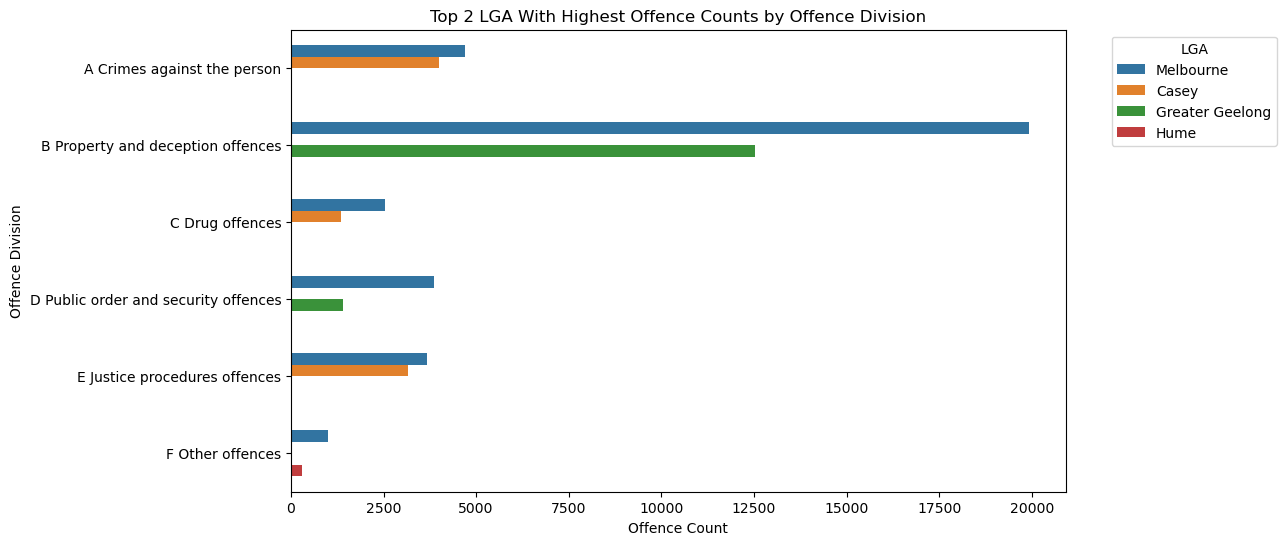

In [7]:
suburb_crime_rate = pd.read_csv('Table 03.csv')

# Show all the Offence Division
display(suburb_crime_rate['Offence Division'].unique())
display(suburb_crime_rate['Offence Subdivision'].unique())

display(suburb_crime_rate.head())

suburb_crime_rate_divison = suburb_crime_rate.groupby(['Local Government Area', 'Year', 'Offence Division']).sum(numeric_only=True).reset_index()
display(suburb_crime_rate_divison.head())

suburb_crime_rate_avg = suburb_crime_rate_divison.groupby(['Local Government Area', 'Offence Division']).mean(numeric_only=True).reset_index()
display(suburb_crime_rate_avg.head())

# Keep only the 'Offence Division' and 'Offence Count' and LGAs
suburb_crime_rate_avg = suburb_crime_rate_avg[['Local Government Area', 'Offence Division', 'Offence Count']]
display(suburb_crime_rate_avg.head())

# Assuming df_offence is your DataFrame
# First, sort by 'Offence Count' in descending order within each 'Offence Division'
df_offence_sorted = suburb_crime_rate_avg.sort_values(by=['Offence Division', 'Offence Count'], ascending=[True, False])

# Now, group by 'Offence Division' and select the top 10 for each division
top_2_per_division = df_offence_sorted.groupby('Offence Division').head(2)


# Plotting top 10 offence counts for each Offence Division
# Plotting top 10 offence counts for each Offence Division
plt.figure(figsize=(10, 6))

# Set dodge=True with a smaller width to reduce gaps between bars within each group
sns.barplot(x='Offence Count', y='Offence Division', data=top_2_per_division, hue='Local Government Area', dodge=True, width=0.6)

plt.title('Top 2 LGA With Highest Offence Counts by Offence Division')
plt.xlabel('Offence Count')
plt.ylabel('Offence Division')
plt.legend(title='LGA', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


#### Trend Analysis

Total number of distinct LGA is 57


LGA Name    0
Region      0
2011        0
2012        0
2013        0
2014        0
2015        0
2016        0
2017        0
2018        0
2019        0
2020        0
dtype: int64

LGA Name     object
Region       object
2011        float64
2012        float64
2013        float64
2014        float64
2015        float64
2016        float64
2017        float64
2018        float64
2019        float64
2020        float64
dtype: object

,LGA,2013,2014,2015,2016,2017,2018,2019
0,Whittlesea,1.010001e+08,1.035006e+08,1.091612e+08,1.116516e+08,1.152932e+08,1.184756e+08,1.207063e+08
1,Northern Grampians,1.014142e+07,1.035065e+07,1.003788e+07,9.050693e+06,9.105582e+06,9.720508e+06,9.200584e+06
2,Greater Geelong,1.097196e+08,1.116281e+08,1.130210e+08,1.132050e+08,1.154188e+08,1.188324e+08,1.203854e+08
3,Colac-Otway,1.019461e+07,1.007489e+07,1.026330e+07,1.016289e+07,1.023095e+07,1.024279e+07,1.075162e+07
4,Moorabool,1.054645e+07,1.030988e+07,1.057564e+07,1.061337e+07,1.139579e+07,1.196206e+07,1.234074e+07


,LGA,2013,2014,2015,2016,2017,2018,2019
28,Melbourne,70739983.13,72707033.11,75868075.11,79770052.63,80349220.84,83992700.4,84505931.59


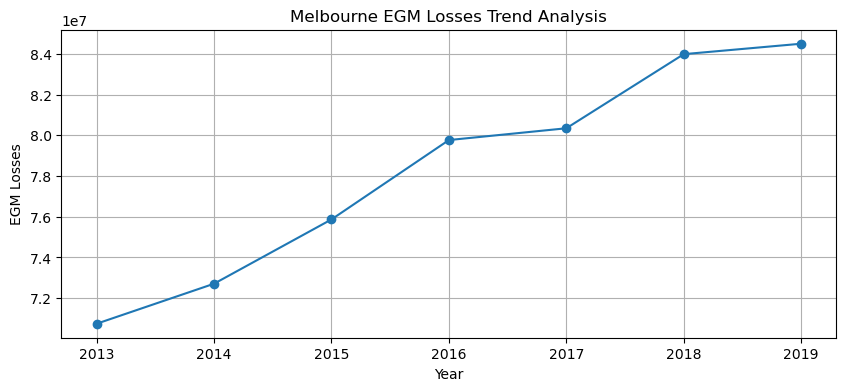

In [8]:
#helper functions
def clean_lga_name(lga_name): 
    # Convert to lowercase, replace "city of" or "shire of", and then capitalize each word
    cleaned_name = lga_name.lower().replace("city of", '').replace("shire of", '').replace('rural city of','').strip().title() 
    return cleaned_name 
    # Apply the function to the 'LGA Name' column


EGM = pd.read_csv("EGM.csv")
# Drop empty rows
EGM = EGM.drop(index = range(57,73))

# Check unique LGA Name
print("Total number of distinct LGA is",len(EGM['LGA Name'].unique()))

EGM['LGA Name'] = EGM['LGA Name'].apply(clean_lga_name)

# Check missing values
display(EGM.isnull().sum())

# Check data types
display(EGM.dtypes)

# Drop Region column
EGM = EGM.drop(columns=['Region'])

# # Average losses from 2011 to 2020
# EGM['Average Losses'] = EGM.iloc[:, 1:].mean(axis=1)
EGM = EGM.drop(columns=['2011', '2012', '2020'])
# display(EGM.head())

# Rename LGA Name to Locality
EGM = EGM.rename(columns={'LGA Name': 'LGA'})
display(EGM.head())

# Get Melbourne LGAs
EGM = EGM[EGM['LGA'] == 'Melbourne']
display(EGM)

# Trend analysis line plot for Melbourne EGM losses
plt.figure(figsize=(10, 4))
plt.plot(EGM.columns[1:], EGM.iloc[0, 1:], marker='o')
plt.title('Melbourne EGM Losses Trend Analysis')
plt.xlabel('Year')
plt.ylabel('EGM Losses')
plt.grid()
plt.show()

,Local Government Area,Year,Offence Subdivision,Year ending,Postcode,Suburb/Town Name,Offence Division,Offence Subgroup,Offence Count
0,Melbourne,2014,A50 RobberyB30 Burglary/Break and enterB40 Theft,DecemberDecemberDecemberDecemberDecemberDecemb...,506848,MelbourneMelbourneEast MelbourneWest Melbourne...,A Crimes against the personA Crimes against th...,A51 Aggravated robberyA52 Non-Aggravated robbe...,11681
1,Melbourne,2015,A50 RobberyB30 Burglary/Break and enterB40 Theft,DecemberDecemberDecemberDecemberDecemberDecemb...,534494,MelbourneMelbourneEast MelbourneWest Melbourne...,A Crimes against the personA Crimes against th...,A51 Aggravated robberyA52 Non-Aggravated robbe...,14133
2,Melbourne,2016,A50 RobberyB30 Burglary/Break and enterB40 Theft,DecemberDecemberDecemberDecemberDecemberDecemb...,535001,CarltonMelbourneMelbourneEast MelbourneEast Me...,A Crimes against the personA Crimes against th...,A51 Aggravated robberyA51 Aggravated robberyA5...,16050
3,Melbourne,2017,A50 RobberyB30 Burglary/Break and enterB40 Theft,DecemberDecemberDecemberDecemberDecemberDecemb...,518890,CarltonMelbourneMelbourneEast MelbourneEast Me...,A Crimes against the personA Crimes against th...,A52 Non-Aggravated robberyA51 Aggravated robbe...,15029
4,Melbourne,2018,A50 RobberyB30 Burglary/Break and enterB40 Theft,DecemberDecemberDecemberDecemberDecemberDecemb...,525506,MelbourneMelbourneEast MelbourneWest Melbourne...,A Crimes against the personA Crimes against th...,A51 Aggravated robberyA52 Non-Aggravated robbe...,13950
5,Melbourne,2019,A50 RobberyB30 Burglary/Break and enterB40 Theft,DecemberDecemberDecemberDecemberDecemberDecemb...,495380,MelbourneMelbourneEast MelbourneWest Melbourne...,A Crimes against the personA Crimes against th...,A51 Aggravated robberyA52 Non-Aggravated robbe...,14496
6,Melbourne,2020,A50 RobberyB30 Burglary/Break and enterB40 Theft,DecemberDecemberDecemberDecemberDecemberDecemb...,473862,MelbourneMelbourneEast MelbourneEast Melbourne...,A Crimes against the personA Crimes against th...,A51 Aggravated robberyA52 Non-Aggravated robbe...,11714
7,Melbourne,2021,A50 RobberyB30 Burglary/Break and enterB40 Theft,DecemberDecemberDecemberDecemberDecemberDecemb...,488885,MelbourneMelbourneEast MelbourneEast Melbourne...,A Crimes against the personA Crimes against th...,A51 Aggravated robberyA52 Non-Aggravated robbe...,11853
8,Melbourne,2022,A50 RobberyB30 Burglary/Break and enterB40 Theft,DecemberDecemberDecemberDecemberDecemberDecemb...,489245,MelbourneMelbourneEast MelbourneEast Melbourne...,A Crimes against the personA Crimes against th...,A51 Aggravated robberyA52 Non-Aggravated robbe...,13148
9,Melbourne,2023,A50 RobberyB30 Burglary/Break and enterB40 Theft,DecemberDecemberDecemberDecemberDecemberDecemb...,528598,CarltonMelbourneMelbourneEast MelbourneEast Me...,A Crimes against the personA Crimes against th...,A51 Aggravated robberyA51 Aggravated robberyA5...,16138


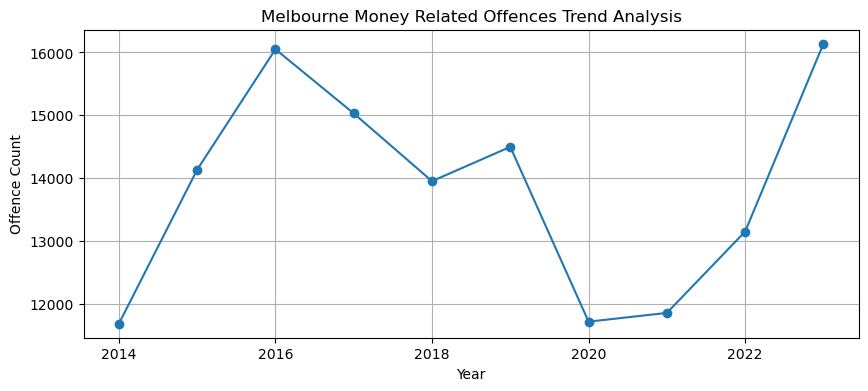

In [9]:
# Money related offences
suburb_crime_rate = pd.read_csv('Table 03.csv')

# Show all the Offence Division
# display(suburb_crime_rate['Offence Division'].unique())
# display(suburb_crime_rate['Offence Subdivision'].unique())

# display(suburb_crime_rate.head())

# Group by 'Suburb/Town Name' and 'Year', and sum the 'Offence Division'
suburb_crime_rate_divison = suburb_crime_rate.groupby(['Local Government Area', 'Year', 'Offence Subdivision']).sum().reset_index()
# display(suburb_crime_rate_divison.head())

suburb_crime_rate_divison = suburb_crime_rate_divison[(suburb_crime_rate_divison['Offence Subdivision'] == 'B40 Theft') | (suburb_crime_rate_divison['Offence Subdivision'] == 'B30 Burglary/Break and enter') | (suburb_crime_rate_divison['Offence Subdivision'] == 'A50 Robbery')]
suburb_crime_rate_divison = suburb_crime_rate_divison[suburb_crime_rate_divison['Local Government Area'] == 'Melbourne']

suburb_crime_rate_divison = suburb_crime_rate_divison.groupby(['Local Government Area', 'Year']).sum().reset_index()
display(suburb_crime_rate_divison)

# Plotting trend analysis for money related offences
plt.figure(figsize=(10, 4))
plt.plot(suburb_crime_rate_divison['Year'], suburb_crime_rate_divison['Offence Count'], marker='o')
plt.title('Melbourne Money Related Offences Trend Analysis')
plt.xlabel('Year')
plt.ylabel('Offence Count')
plt.grid()
plt.show()


'There are 0 missing values in the DataFrame'

'There are 774 unique Suburbs'

Locality                     object
2013                         object
2014                         object
2015                         object
2016                         object
2017                         object
2018                         object
2019                         object
2020                          int64
2021                          int64
2022                          int64
2023                          int64
Change Percentage  13-23    float64
dtype: object

,Locality,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Change Percentage 13-23
0,Abbotsford,792500,862500,925000,1187500,1280000,1192500,1050000,1200000,1365000,1346000,1250000,58.0
130,Carlton,1002500,1020000,830000,1050000,1470000,1625000,1308000,1452500,1492500,1512500,1485000,48.0
172,Collingwood,741000,775000,914000,920000,1205000,1110000,1060000,1155000,1251500,1302000,1225000,65.0
233,East Melbourne,1790000,1850000,2750000,3655000,3585000,2675000,3090000,2862500,3300000,3127500,3363000,88.0
262,Fitzroy,945000,1130000,1297500,1600000,1625000,1450000,1400000,1400000,1520000,1502500,1530000,62.0
372,Kensington,690000,737500,823500,908000,1019000,1020000,978000,1106500,1165000,1200000,1040000,51.0
528,North Melbourne,802500,832000,943000,1200000,1380000,1185000,1375000,1151500,1311500,1310000,1220000,52.0
552,Parkville,1200000,1525000,1360500,2130000,2287500,2430000,1480000,1950000,2301500,1910000,2477000,106.0
643,South Melbourne,1030000,1200000,1310000,1595000,1532500,1465000,1355000,1580000,1710000,1882500,1630000,58.0
748,West Footscray,553000,637500,697000,798000,887500,875000,785000,835000,1051500,960500,915000,65.0


2013     950136.363636
2014    1044136.363636
2015    1168681.818182
2016         1468000.0
2017    1601954.545455
2018    1490681.818182
2019    1354409.090909
2020    1446181.818182
2021         1613500.0
2022    1585545.454545
2023    1577272.727273
dtype: object

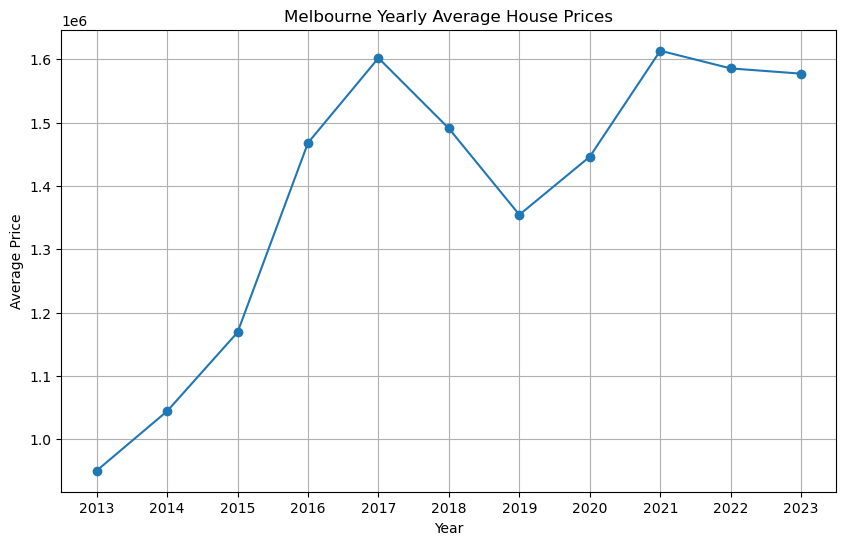

In [10]:
df_house = pd.read_csv('Houses-by-suburb.csv')
# display(df_house.head())

# Filter the df to display rows where column contains '-'
rows_with_hyphen = df_house[df_house.apply(lambda row: row.astype(str).str.contains('-').any(), axis=1)]

# display(rows_with_hyphen)

# Drop these rows
df_house = df_house.drop(rows_with_hyphen.index)
# display(df_house.head())

display(f"There are {df_house.isnull().sum().sum()} missing values in the DataFrame")
display(f"There are {df_house['Locality'].nunique()} unique Suburbs")

# Change Locality to first letter capitalized
df_house['Locality'] = df_house['Locality'].str.title()

# # Calculate the average price per suburb
# df_house['Average Price'] = df_house.iloc[:, 1:-1].mean(axis=1)
# display(df_house)

# # Keep locality, average price and change
# df_house = df_house[['Locality', 'Average Price', 'Change Percentage  13-23']]
# display(df_house)

melbourne_suburbs = [
    "Melbourne",
    "Carlton",
    "Docklands",
    "East Melbourne",
    "North Melbourne",
    "South Melbourne",
    "West Melbourne",
    "Fitzroy",
    "Kensington",
    "Southbank",
    "Parkville",
    "Collingwood",
    "Abbotsford",
    "West Footscray",
    "North Fitzroy"
]

# Check data types


# Change 2013-2019 to int
df_house.iloc[:, 1:-1] = df_house.iloc[:, 1:-1].astype(int)
display(df_house.dtypes)

df_house = df_house[df_house['Locality'].isin(melbourne_suburbs)]
display(df_house)

# Calculate the yearly average for each year
yearly_averages = df_house.drop(columns=["Locality", "Change Percentage  13-23"]).mean()
display(yearly_averages)

# Plot the yearly average house prices
plt.figure(figsize=(10, 6))
plt.plot(yearly_averages.index, yearly_averages.values, marker='o')
plt.title('Melbourne Yearly Average House Prices')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid()
plt.show()





,Year,Year ending,Local Government Area,Investigation Status,Offence Count
0,2023,December,Alpine,Arrest/Summons,274
1,2023,December,Alpine,Not authorised,26
2,2023,December,Alpine,Other,72
3,2023,December,Alpine,Unsolved,147
4,2023,December,Ararat,Arrest/Summons,705


,Local Government Area,Investigation Status,Offence Count
172,Melbourne,Arrest/Summons,17557.7
173,Melbourne,Not authorised,1280.5
174,Melbourne,Other,4518.5
175,Melbourne,Unsolved,12323.7


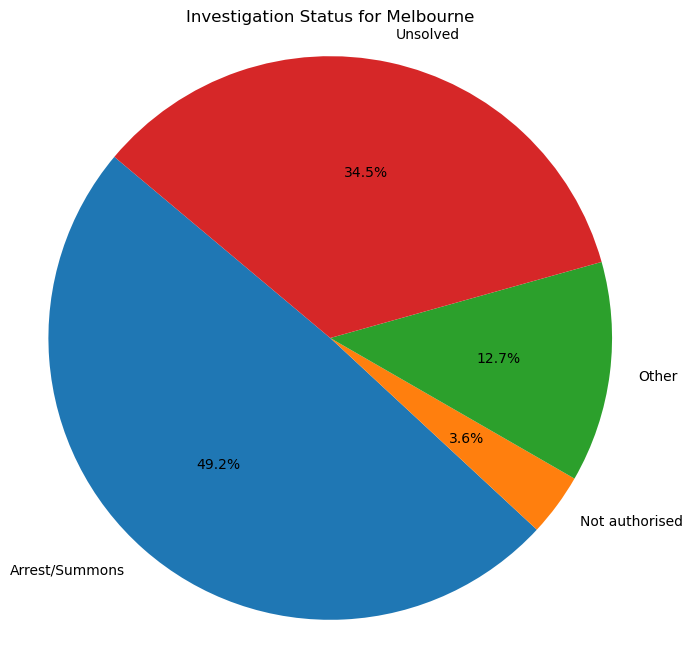

In [11]:
# Load the dataset
investigation_status = pd.read_csv('Table 05.csv')
display(investigation_status.head())

status = investigation_status.groupby(['Local Government Area', 'Investigation Status']).mean(numeric_only=True).reset_index()
status.drop(columns=['Year'], inplace=True)


# Find Melbourne in Local Government Area
melbourne = status[status['Local Government Area'].str.contains('Melbourne')]
display(melbourne.head())
# Plot the investigation status for Melbourne using pie chart
plt.figure(figsize=(8, 8))
plt.pie(melbourne['Offence Count'], labels=melbourne['Investigation Status'], autopct='%1.1f%%', startangle=140)
plt.title('Investigation Status for Melbourne')
plt.axis('equal')
plt.show()

## 4.4 Supervised Model

In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV

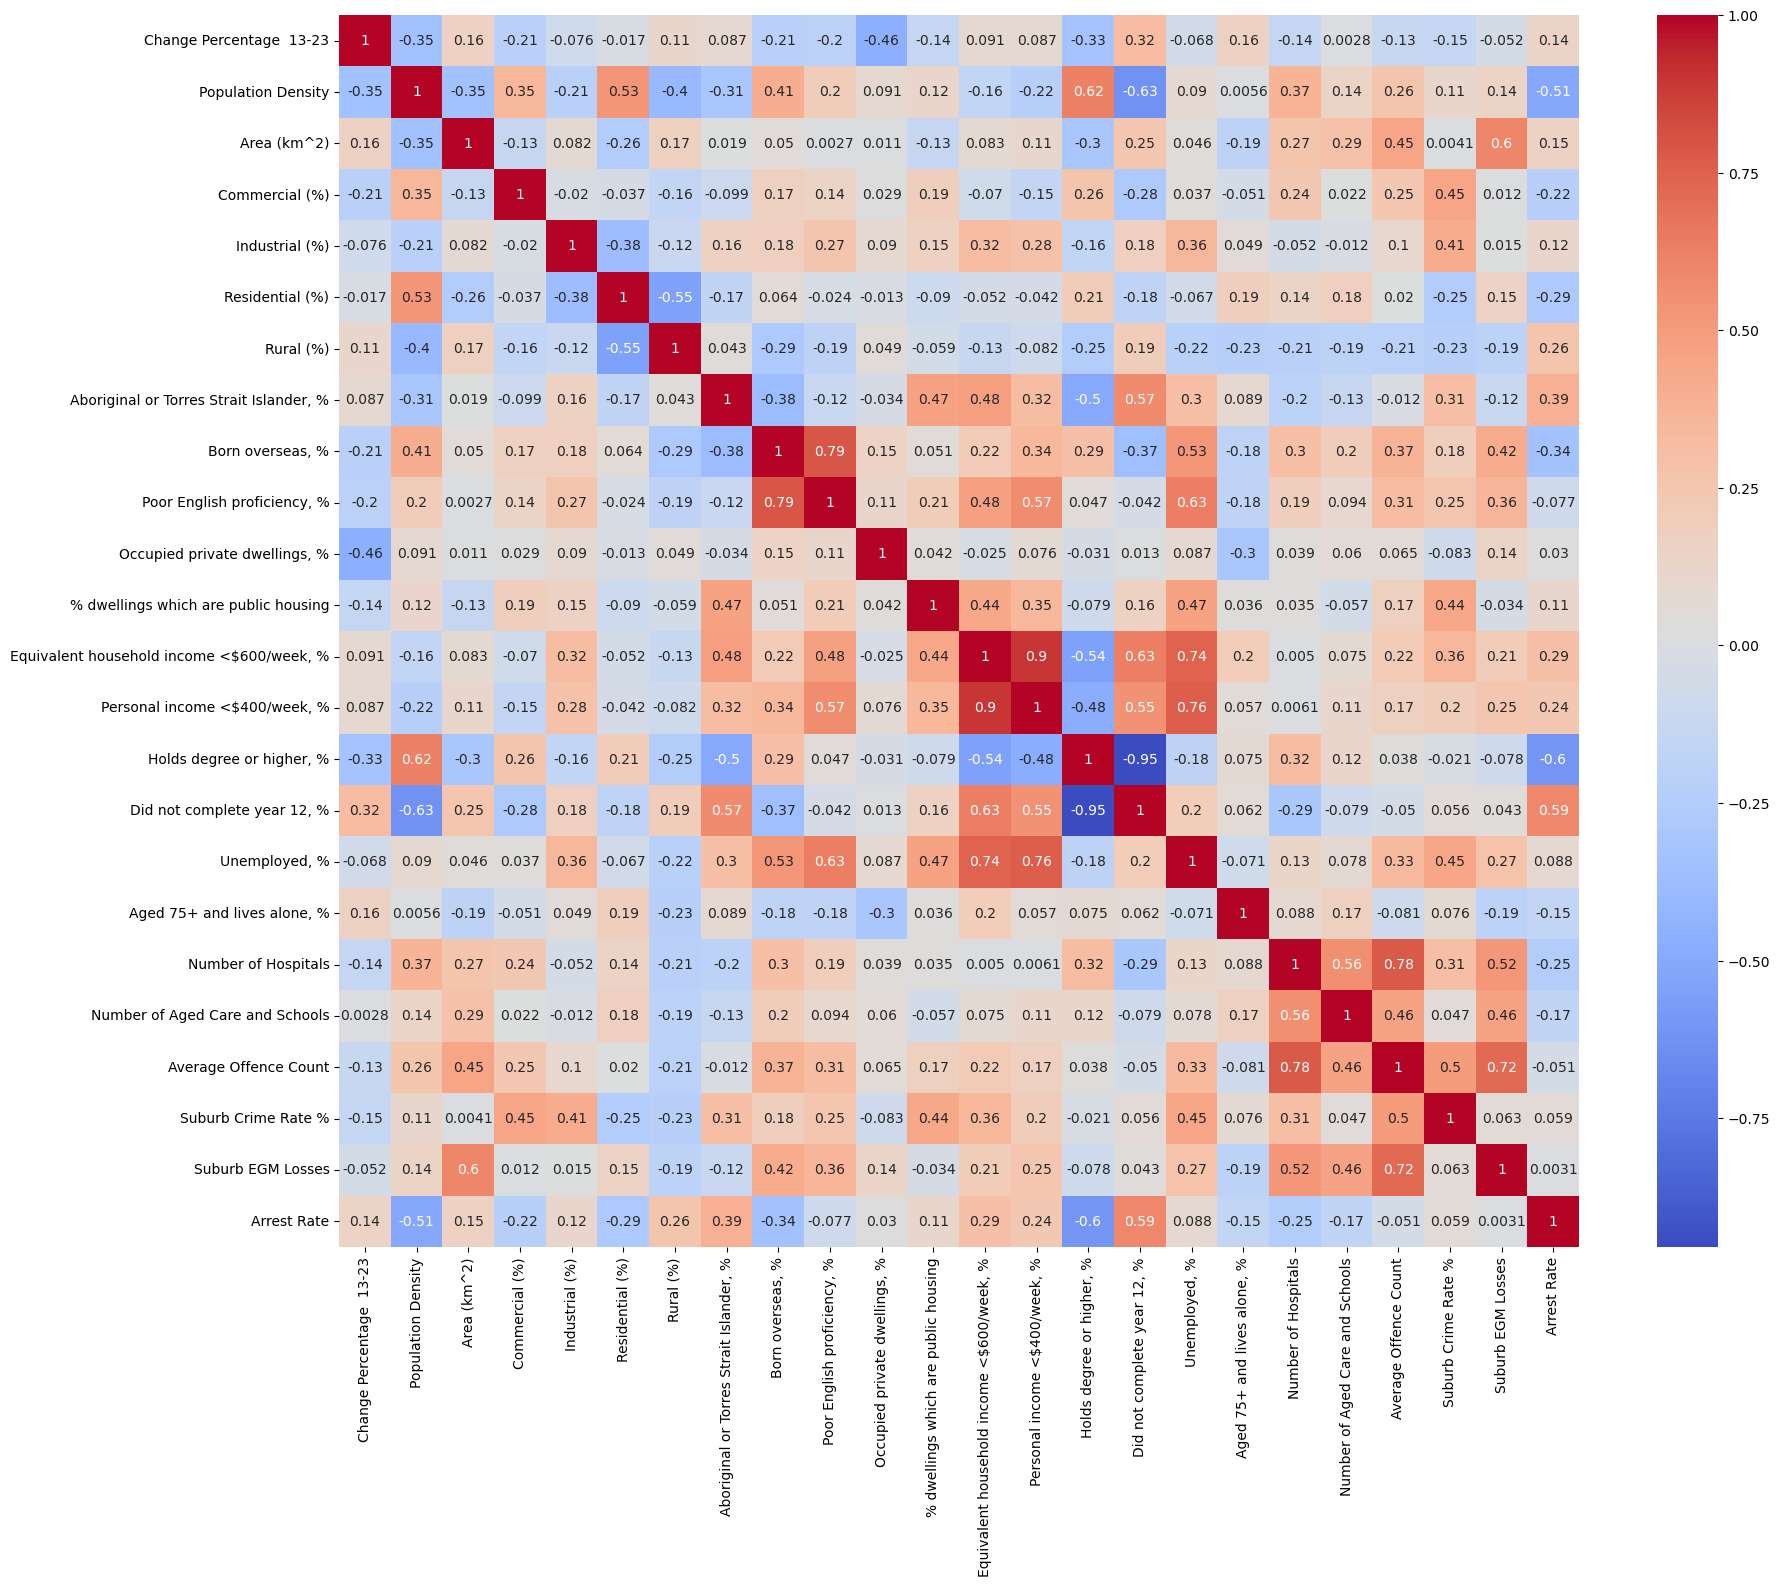

In [13]:
# Check correlation
corr = df.corr(numeric_only=True)
plt.figure(figsize=(20, 16))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [14]:
features = ['Average Price', 'Number of Hospitals', 'Unemployed, %', \
             'Change Percentage  13-23', 'Commercial (%)', 'Aboriginal or Torres Strait Islander, %', '% dwellings which are public housing', 'Personal income <$400/week, %', 'Industrial (%)', 'Residential (%)', 'Rural (%)', 'Born overseas, %', 'Equivalent household income <$600/week, %']

X = df[features]  # Features
y = df['Suburb Crime Rate %']  # Target variable
# Log transformation of Suburb Crime Rate
y_log = np.log1p(df['Suburb Crime Rate %'])  # log(1 + Crime Rate)

# Scale the features
# scaler = MinMaxScaler()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Update the DataFrame with scaled features
df_scaled = df.copy()
df_scaled[features] = X_scaled
df_scaled['Suburb Crime Rate %'] = y_log

# Only keep features and target variable and Locality
df_scaled = df_scaled[['Locality'] + features + ['Suburb Crime Rate %']]

# Display scaled data
display(df_scaled.head())



# Create a 5-fold cross-validation object
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 1. Linear Regression (with cross-validation)
model = LinearRegression()

# Perform cross-validation and evaluate the model
cv_mse = -cross_val_score(model, X_scaled, y_log, cv=kf, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(cv_mse)
cv_mae = -cross_val_score(model, X_scaled, y_log, cv=kf, scoring='neg_mean_absolute_error')
cv_r2 = cross_val_score(model, X_scaled, y_log, cv=kf, scoring='r2')

# Print the cross-validated performance metrics for Linear Regression
print(f"Linear Regression Model Performance (5-Fold CV):")
print(f"Mean Squared Error (MSE): {cv_mse.mean()}")
print(f"Root Mean Squared Error (RMSE): {cv_rmse.mean()}")
print(f"Mean Absolute Error (MAE): {cv_mae.mean()}")
print(f"R^2 Score: {cv_r2.mean()}")


# 2. Decision Tree Regressor (with cross-validation using the best hyperparameters)
best_params = {'criterion': 'friedman_mse', 'max_depth': 20, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 20}


dt_best_model = DecisionTreeRegressor(
    criterion=best_params['criterion'],
    max_depth=best_params['max_depth'],
    max_features=best_params['max_features'],
    max_leaf_nodes=best_params['max_leaf_nodes'],
    min_impurity_decrease=best_params['min_impurity_decrease'],
    min_samples_leaf=best_params['min_samples_leaf'],
    min_samples_split=best_params['min_samples_split'],
    random_state=42
)

# Perform cross-validation for the Decision Tree model
cv_mse_dt_best = -cross_val_score(dt_best_model, X_scaled, y_log, cv=kf, scoring='neg_mean_squared_error')
cv_rmse_dt_best = np.sqrt(cv_mse_dt_best)
cv_mae_dt_best = -cross_val_score(dt_best_model, X_scaled, y_log, cv=kf, scoring='neg_mean_absolute_error')
cv_r2_dt_best = cross_val_score(dt_best_model, X_scaled, y_log, cv=kf, scoring='r2')

# Print the cross-validated performance metrics for Decision Tree Regressor
print(f"Decision Tree Model Performance with Best Parameters (5-Fold CV):")
print(f"Mean Squared Error (MSE): {cv_mse_dt_best.mean()}")
print(f"Root Mean Squared Error (RMSE): {cv_rmse_dt_best.mean()}")
print(f"Mean Absolute Error (MAE): {cv_mae_dt_best.mean()}")
print(f"R² Score: {cv_r2_dt_best.mean()}")


,Locality,Average Price,Number of Hospitals,"Unemployed, %",Change Percentage 13-23,Commercial (%),"Aboriginal or Torres Strait Islander, %",% dwellings which are public housing,"Personal income <$400/week, %",Industrial (%),Residential (%),Rural (%),"Born overseas, %","Equivalent household income <$600/week, %",Suburb Crime Rate %
0,Abbotsford,0.380075,0.090967,-0.321739,-1.462230,3.530126,-0.442718,-0.310185,-1.141294,1.354951,-1.201445,-0.394268,0.296857,-0.989416,3.311998
1,Aberfeldie,0.948598,-0.640699,-0.701874,-0.786744,-0.318076,-0.479465,-0.207366,-0.684791,-0.451797,0.659483,-0.394268,-0.848846,-1.118858,1.541867
2,Airport West,-0.280303,-0.507669,-0.321449,-0.497250,4.004741,-0.319962,-0.638257,0.475661,-0.300894,0.079221,-0.394268,0.019776,0.432799,2.638687
3,Albanvale,-0.835202,-0.773729,1.860139,0.081738,-0.542988,-0.078249,-0.011685,1.771388,-0.451797,1.363021,-0.394268,1.606498,1.527493,2.091815
4,Albert Park,1.927469,0.223997,-0.696959,-1.269234,0.016140,-0.651788,0.100757,-1.397308,-0.451797,-1.278551,-0.394268,-0.141799,-1.190923,2.295428


Linear Regression Model Performance (5-Fold CV):
Mean Squared Error (MSE): 0.09015220177955233
Root Mean Squared Error (RMSE): 0.29881442221101645
Mean Absolute Error (MAE): 0.22896349573947566
R^2 Score: 0.6421187456330031
Decision Tree Model Performance with Best Parameters (5-Fold CV):
Mean Squared Error (MSE): 0.15815269741766608
Root Mean Squared Error (RMSE): 0.396121693209148
Mean Absolute Error (MAE): 0.30911424706264606
R² Score: 0.3737824769531728
